### Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help to understand various patterns among the data that might be useful in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

Data Dictionary Train Data

Variable

Definition

ID

Unique Identifier for a row

Gender

Gender of the Customer

Age

Age of the Customer (in Years)

Region_Code

Code of the Region for the customers

Occupation

Occupation Type for the customer

Channel_Code

Acquisition Channel Code for the Customer (Encoded)

Vintage

Vintage for the Customer (In Months)

Credit_Product

If the Customer has any active credit product (Home loan,

Personal loan, Credit Card etc.)

Avg_Account_Balance

Average Account Balance for the Customer in last 12 Months

Is_Active

If the Customer is Active in last 3 Months

Is_Lead(Target)

If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested

Sample Submission

This file contains the exact submission format for the predictions. Please submit CSV file only. Variable Definition ID Unique Identifier for a row Is_Lead (Target) Probability of Customer showing interest (class 1)


In [1]:
# Opening and Reading data

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
import sys
sys.path.append('/home/kshitij/Documents/Data Science Bootcamp/functions/')
import uni 

# Test the function
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
uni.unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Avg_Account_Balance,245725,0,135292,int64,True,4022185,1128403.101019,20790,604310.0,894601.0,1366666.0,10352009,852936.356069,2.968727,14.304594
Is_Lead,245725,0,2,int64,True,0,0.237208,0,0.0,0.0,0.0,1,0.425372,1.235596,-0.473307
Vintage,245725,0,66,int64,True,13,46.959141,7,20.0,32.0,73.0,135,32.353136,0.790189,-0.69654
Age,245725,0,63,int64,True,28,43.856307,23,30.0,43.0,54.0,85,14.828672,0.618992,-0.441273
ID,245725,0,245725,object,False,222A8XWS,-,-,-,-,-,-,-,-,-
Region_Code,245725,0,35,object,False,RG268,-,-,-,-,-,-,-,-,-
Occupation,245725,0,4,object,False,Self_Employed,-,-,-,-,-,-,-,-,-
Channel_Code,245725,0,4,object,False,X1,-,-,-,-,-,-,-,-,-
Gender,245725,0,2,object,False,Male,-,-,-,-,-,-,-,-,-
Credit_Product,216400,29325,2,object,False,No,-,-,-,-,-,-,-,-,-


In [5]:
df['Credit_Product'] = df['Credit_Product'].fillna(df['Credit_Product'].mode()[0])

In [6]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [7]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)    


def Chisquare(df, feature, label):
    import pandas as pd
    import scipy.stats
    ct = pd.crosstab(index = df[feature], columns=df[label])
    chi2, p,dof,_ = scipy.stats.chi2_contingency([ct.iloc[0].values, ct.iloc[1].values])
    return chi2,p
    



def T(df, feature, label): 
    import pandas as pd
    import numpy as np
    from scipy import stats
    partial_high_school = df[df[feature] == (df[feature].unique()[0])]
    high_school = df[df[feature] == (df[feature].unique()[1])]
    t, p = stats.ttest_ind(partial_high_school[label],high_school[label] )
    return t,p


def scatter(feature, label):
    import seaborn as sns
    from scipy import stats
    import matplotlib.pyplot as plt
    import pandas as pd
    
    m,b,r,p,err = stats.linregress(feature, label)
    
    textstr  = 'y =  ' + str(round(m,2)) + 'x + '+str(round(b,2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2,2))+'\n'
    textstr += 'p =  ' + str(round(p,2))+'\n'
    textstr += str(feature.name) + ' skew = '+str(round(feature.skew(),2))+'\n'
    textstr += str(label.name) + ' skew = '+str(round(label.skew(),2))
    textstr += str(heteroscedasticty(pd.DataFrame(label).join(pd.DataFrame(feature)),feature.name, label.name))

    sns.set(color_codes = True)
    ax = sns.jointplot(feature, label, kind='reg')
    ax.fig.text(1, 0.114, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()   


def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings("ignore")
        
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    oneway = stats.f_oneway(*group_labels)
    
    unique_groups = df[feature].unique()
    
    ttests = []
    
    for i,group in enumerate(unique_groups):
        for i2,group_2 in enumerate(unique_groups):
            if i2>i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]

   
                t,p = stats.ttest_ind(type_1[label],type_2[label])
                ttests.append([group, group_2, t.round(4), p.round(4)])
    if len(ttests)>0:
            
        p_threshold = 0.05 / len(ttests)
    else:
        p_threshold = 0.05
    textstr = '         ANOVA'+'\n'
    textstr += 'F:      '+str(oneway[0].round(2)) +'\n'
    textstr += 'p-value:    '+str(oneway[1].round(2))+ '\n\n'
    textstr += 'Sig. comparisions(Bonferron1-corrected)'+'\n'
    

    
    ax = sns.barplot(df[feature],df[label])
    ax.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()
    

def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
#   Create an empty Dataframe to store the output
    output_df = pd.DataFrame(columns = ['Stat_r', '+/-_F', 'Effect_size_X^2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df[label]):
                    r, p = stats.pearsonr(df[label], df[col])
                    if r > 0:
                        output_df.loc[col] = ['r', '+', abs(round(r, 3)), round(p, 6)]
                        scatter(df[col], df[label])
                    else:
                        output_df.loc[col] = ['r', '-', abs(round(r, 3)), round(p, 6)]
                        scatter(df[col], df[label])
                elif((pd.api.types.is_numeric_dtype(df[label])) and not (pd.api.types.is_numeric_dtype(df[col])) and (df[col].nunique()==2)):
                        t, p = T(df[[col,label]],col,label)
                        output_df.loc[col] = ['t','',round(t,3),round(p,6) ]
                        bar_chart(df,col,label)
                elif((pd.api.types.is_numeric_dtype(df[col])) and not (pd.api.types.is_numeric_dtype(df[label])) and (df[label].nunique()==2)):
                        t, p = T(df[[col, label]],label,col)
                        output_df.loc[col] = ['t','',round(t,3),round(p,6) ]
                        bar_chart(df,label,col)
                elif (pd.api.types.is_numeric_dtype(df[label]) and not pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique()!=2):
                    F, p = anova(df[[col, label]],col,label)
                    output_df.loc[col] = ['F','',round(F,3),round(p,6) ]
                    bar_chart(df,col,label)
                elif  (pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_numeric_dtype(df[label])):
                    F, p = anova(df[[col, label]],label,col)
                    output_df.loc[col] = ['F','',round(F,3),round(p,6) ]
                    bar_chart(df,label,col)
                elif (not pd.api.types.is_numeric_dtype(df[label]) and not pd.api.types.is_numeric_dtype(df[col]) ):
                    X, p = Chisquare(df[[col, label]],col,label)
                    output_df.loc[col] = ['X','',round(X,3),round(p,6) ]


                
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, 'Nulls']
    
    return output_df.sort_values(by=['Effect_size_X^2','Stat_r'],ascending=[False,False])

In [8]:
df=df.drop('ID',axis=1)

In [9]:
df['Is_Lead'] = df['Is_Lead'].astype('category')

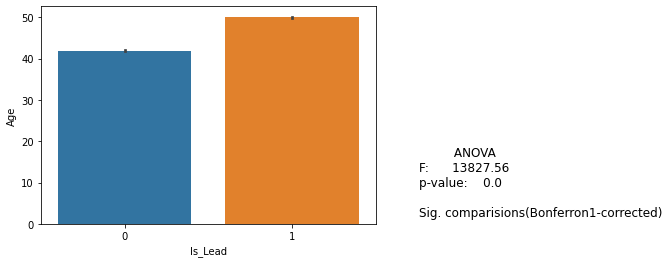

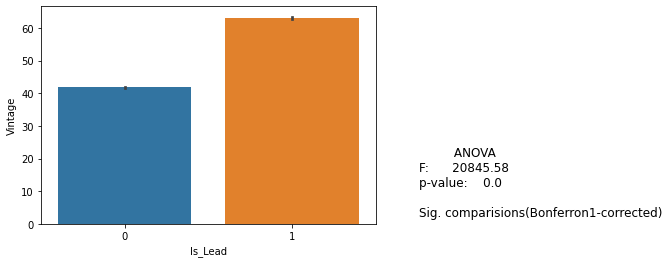

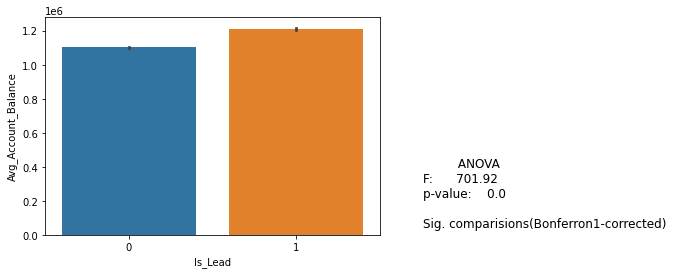

,Stat_r,+/-_F,Effect_size_X^2,p-value
Channel_Code,X,,15204.67500,0.00000
Credit_Product,X,,3404.00600,0.00000
Occupation,X,,2304.71300,0.00000
Is_Active,X,,1805.29700,0.00000
Gender,X,,1275.90300,0.00000
Region_Code,X,,58.60500,0.00000
Avg_Account_Balance,t,,-26.49400,0.00000
Age,t,,-117.59100,0.00000
Vintage,t,,-144.38000,0.00000


In [10]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
bivstats(df, 'Is_Lead')

In [11]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [12]:
df.loc[:,df.select_dtypes(exclude=['object','category']).columns.tolist()].columns

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

In [13]:
customer_details = ['Age', 'Vintage', 'Avg_Account_Balance']

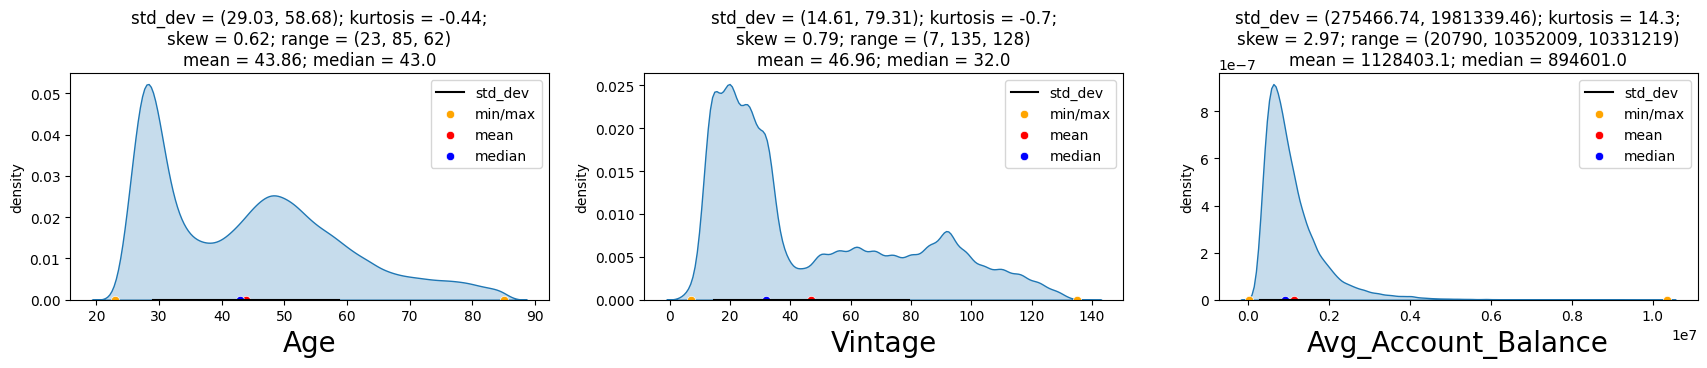

In [14]:
UVA_numeric(df,customer_details)

In [15]:
df.loc[:,df.select_dtypes(include=['object','category']).columns.tolist()].columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Is_Lead'],
      dtype='object')

In [16]:
group2 = ['Gender','Occupation','Credit_Product',]
group3 = [ 'Region_Code',  'Channel_Code', 'Is_Active', 'Is_Lead']

In [17]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y = norm_count,x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

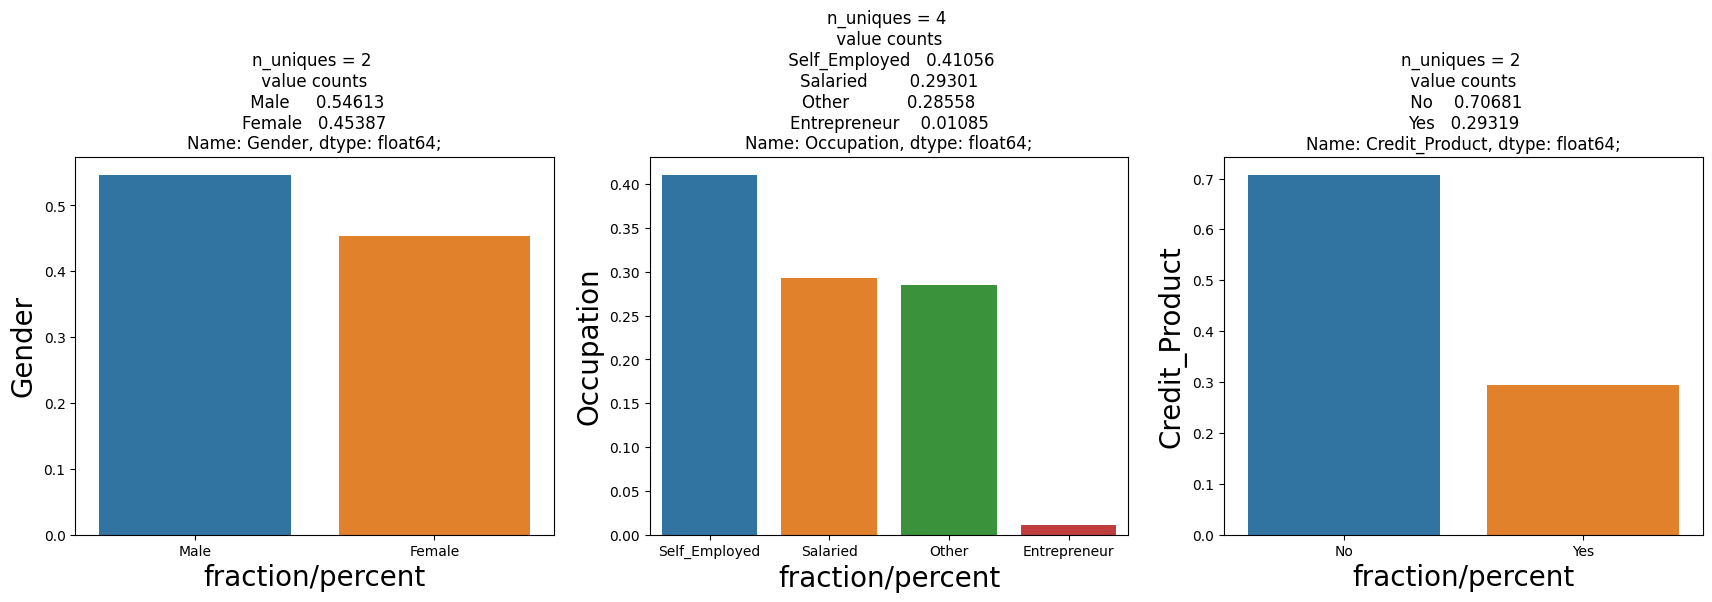

In [18]:
UVA_category(df,group2)

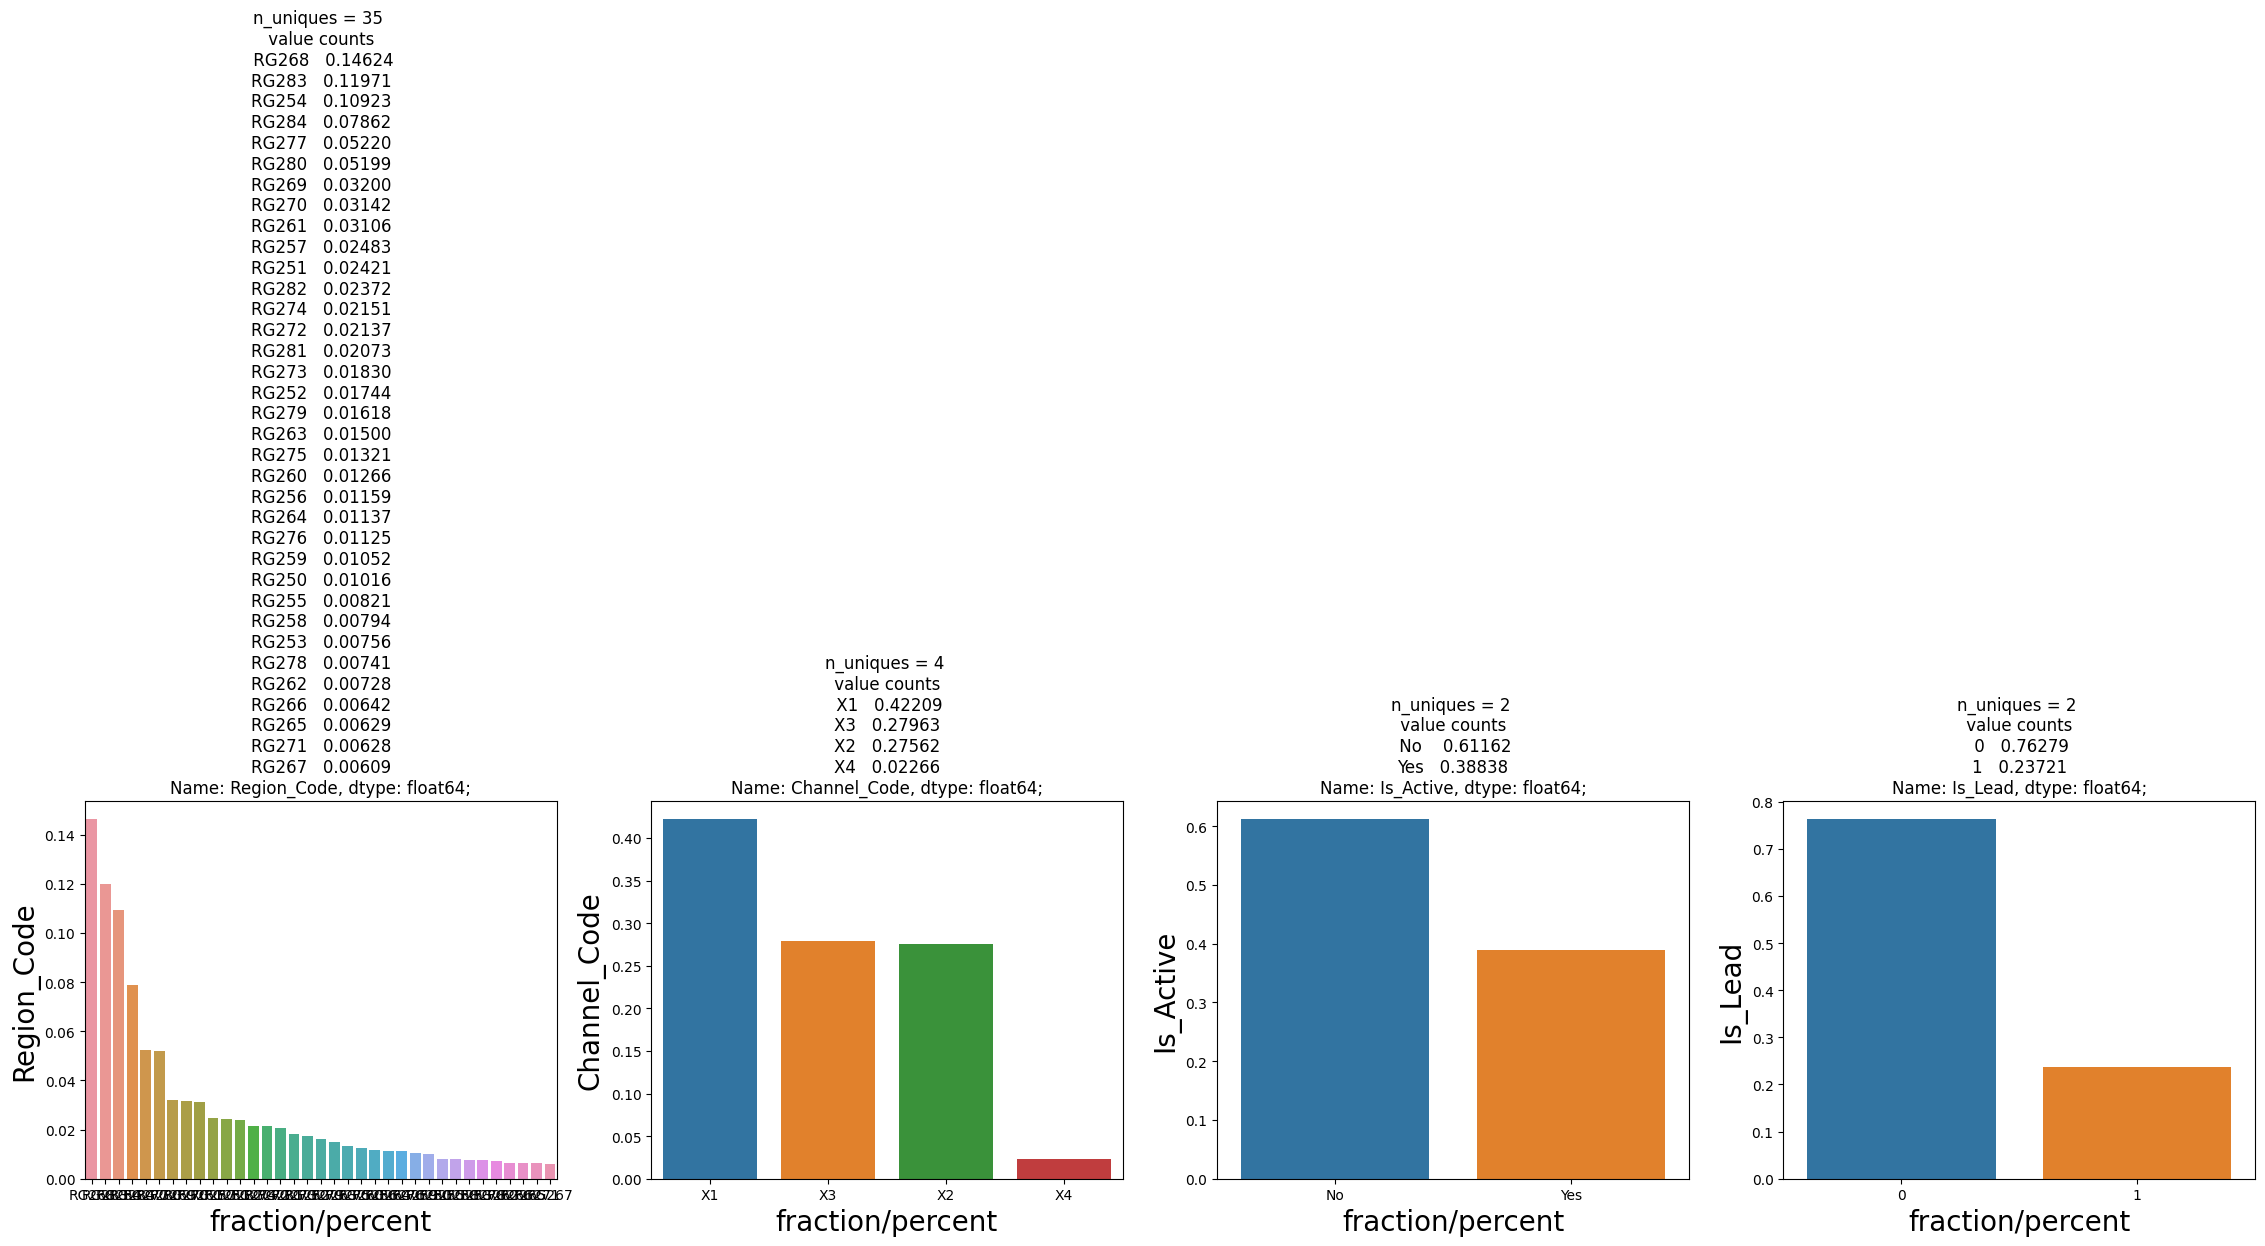

In [19]:
UVA_category(df,group3)

In [20]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True


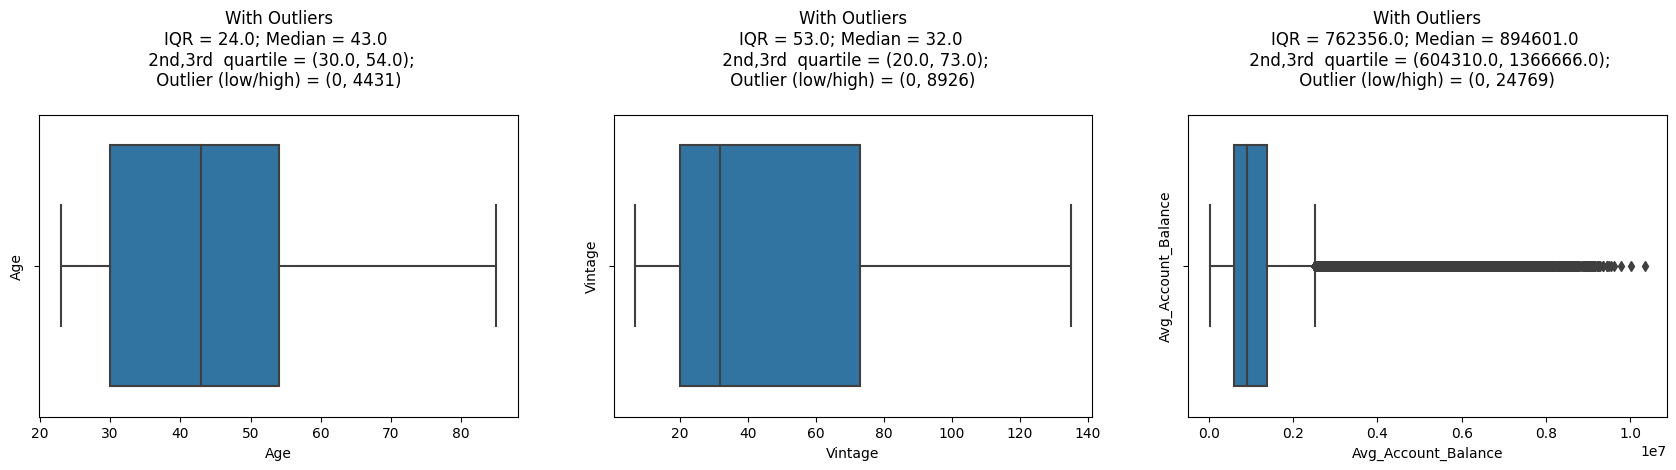

In [21]:
UVA_outlier(df,customer_details)

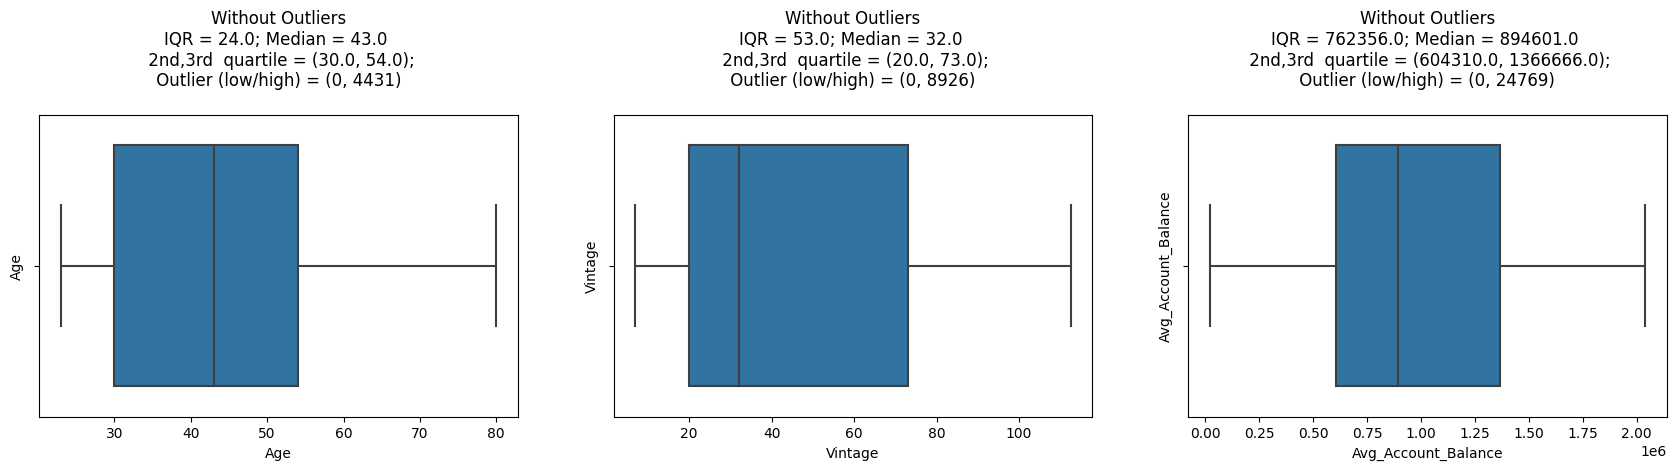

In [22]:
UVA_outlier(df, customer_details, include_outlier=False)

## Bivariate Analysis : Numerical-Numerical

In [23]:
df.corr()

,Age,Vintage,Avg_Account_Balance
Age,1.00000,0.63124,0.14523
Vintage,0.63124,1.00000,0.16743
Avg_Account_Balance,0.14523,0.16743,1.00000


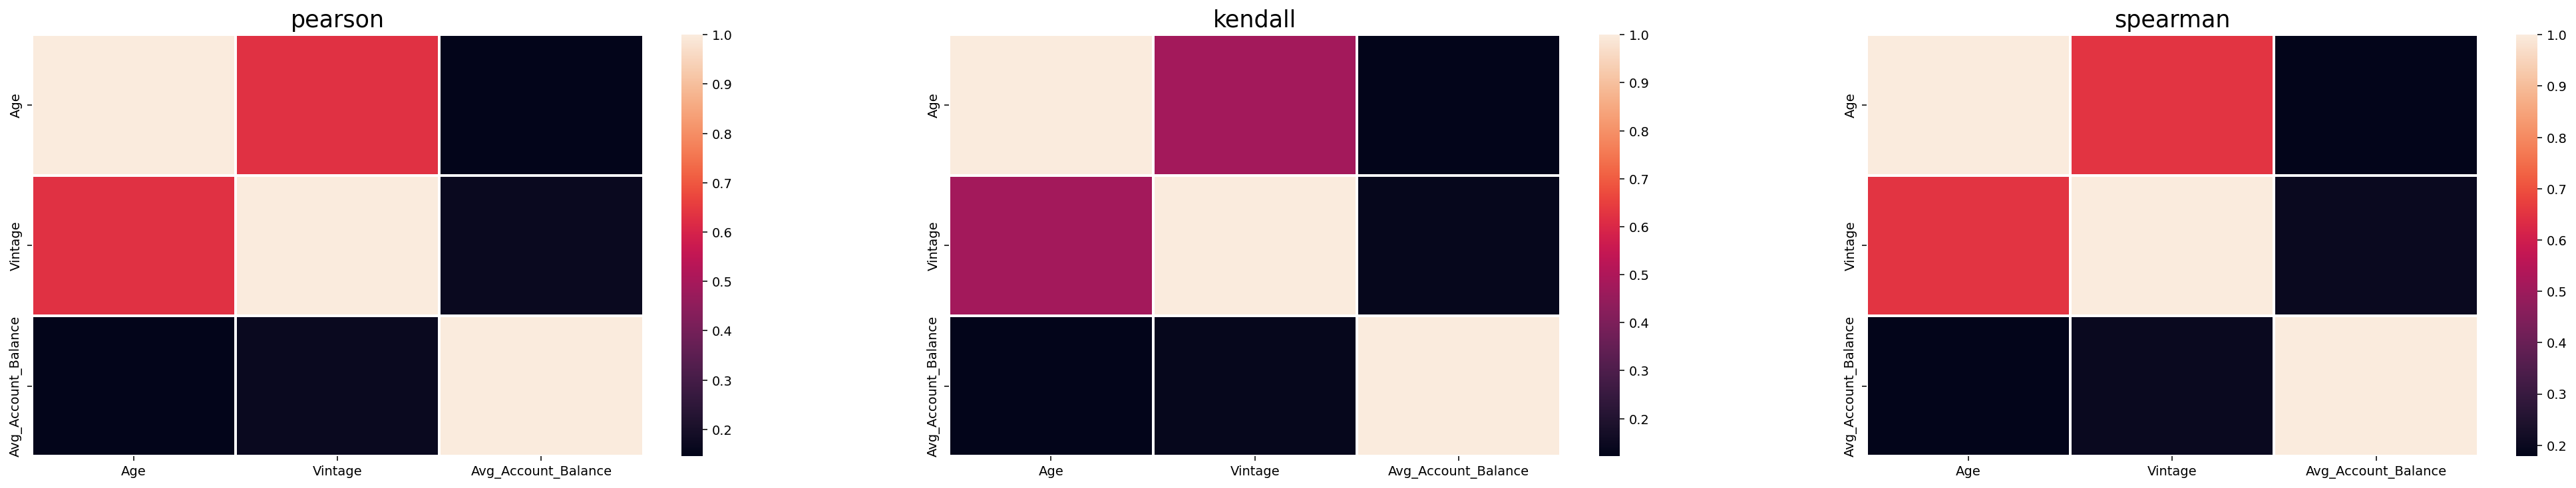

In [24]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df.corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

<Figure size 840x560 with 0 Axes>

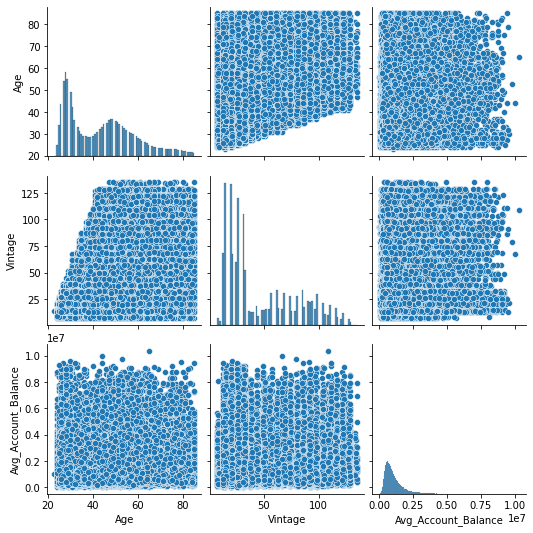

In [25]:
plt.figure(dpi=140)
sns.pairplot(df)

## Bivariate : Numerical-Categorical

In [26]:
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

In [27]:
df.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.00000,245725.00000,245725.00000
mean,43.85631,46.95914,1128403.10102
std,14.82867,32.35314,852936.35607
min,23.00000,7.00000,20790.00000
25%,30.00000,20.00000,604310.00000
50%,43.00000,32.00000,894601.00000
75%,54.00000,73.00000,1366666.00000
max,85.00000,135.00000,10352009.00000


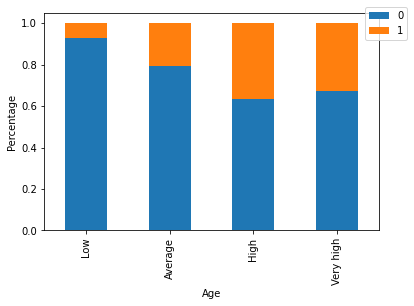

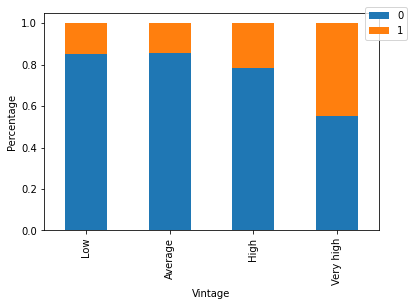

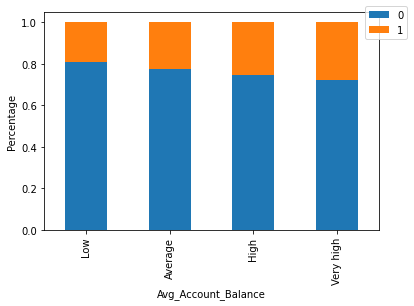

In [28]:
label = 'Is_Lead'
for col in numerical:
    bins = [df[col].min(),df[col].quantile([.25]).values[0],df[col].quantile([.5]).values[0],df[col].quantile([.75]).values[0], df[col].max() ]
    group=['Low','Average','High', 'Very high'] 
    df['units_bin']=pd.cut(df[col],bins,labels=group)
    units_bin=pd.crosstab(df['units_bin'],df[label])
    units_bin.div(units_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
    plt.xlabel(col)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    P = plt.ylabel('Percentage')

## Outlier Analysis

<Figure size 432x288 with 0 Axes>

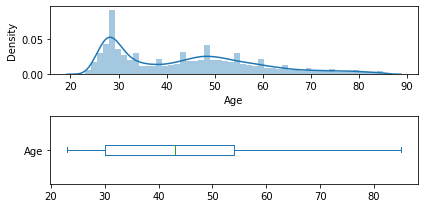

<Figure size 432x288 with 0 Axes>

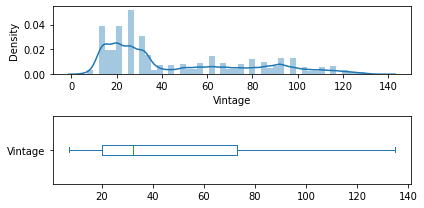

<Figure size 432x288 with 0 Axes>

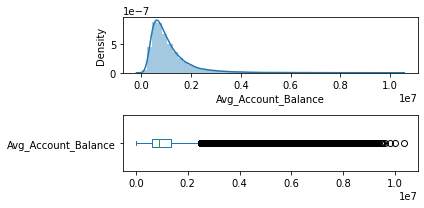

In [29]:
for col in df.loc[:,df.select_dtypes(exclude=['object','category']).columns.tolist()].columns:
    plt.figure() 

    f = plt.figure()
    f.set_figwidth(6)
    f.set_figheight(3)

    plt.subplot(211) 
    sns.distplot(df[col]); 
    plt.subplot(212) 
    df[col].plot.box(vert=False) 
    plt.tight_layout()
    plt.show()

## Bivariate : Categorical-Categorical

In [30]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [31]:
categorical = df.select_dtypes(exclude=['int64','float64','Int64'])[:]

In [32]:
categorical = categorical.drop('units_bin',axis=1)

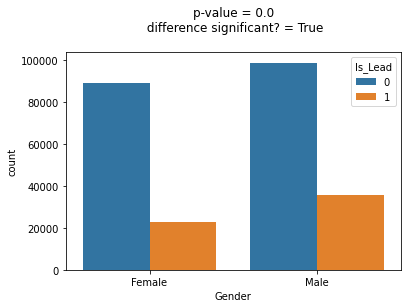

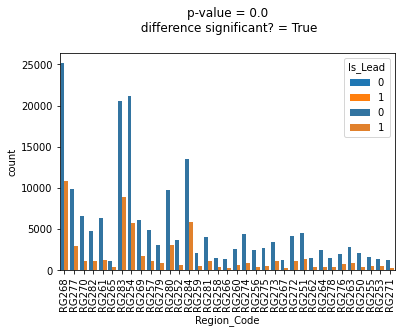

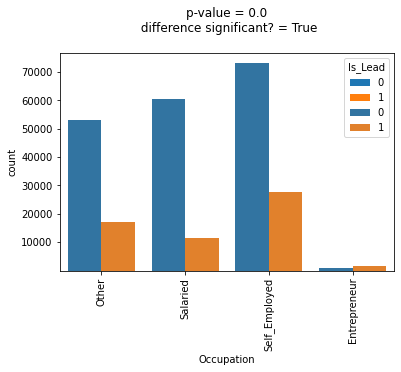

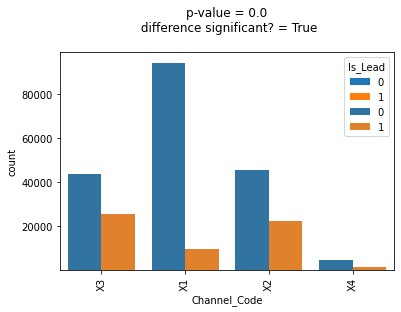

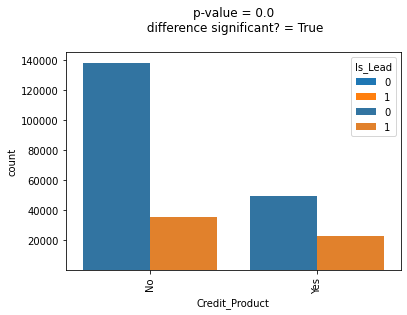

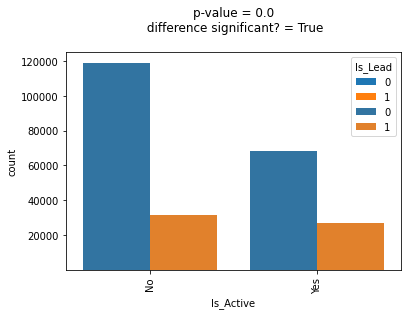

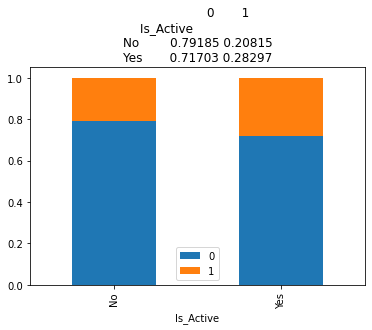

In [33]:
label = 'Is_Lead'
for col in categorical:
    if col!=label:
        BVA_categorical_plot(df, label, col)

In [34]:
df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,units_bin
0,Female,73,RG268,Other,X3,43,No,1045696,No,0,High
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Low
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Very high
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Low
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Average
...,...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0,Very high
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,Average
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0,Average
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0,Low


In [35]:
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]

In [36]:
# multicollinearity
# VIF = variance inflation factor = 1/(1-R2)

def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    vif_dict, tolerance_dict = {}, {}
    
    for col in df:
        y = df[col]
        X = df.drop(columns=[col])
        
        r_squared = LinearRegression().fit(X, y).score(X, y)
        
        if r_squared <1:
            vif = 1/(1 - r_squared)
        else:
            vif = 100   
        vif_dict[col] = vif
            
        tolerance = 1 - r_squared
        tolerance_dict[col] = tolerance
        
        df_output = pd.DataFrame({'VIF':vif_dict,'Tolerance':tolerance_dict})
    return df_output.sort_values(by=['VIF'],ascending=False)
vif(numerical)

,VIF,Tolerance
Vintage,1.67878,0.59567
Age,1.66688,0.59992
Avg_Account_Balance,1.03160,0.96937
